# Deep Learning Functions



In [1]:
#import imp
import utility
import numpy as np
#imp.reload(utility)

plot = utility.Plot(['incoming', 'other', 'outgoing'], (-15, 15), (-15, 15), 500)
plot.view(elev=0, azim=210)
incoming = plot.coords()

# Activation Functions
<br><br>

## Linear Activation function

# $$ f(x) = x $$


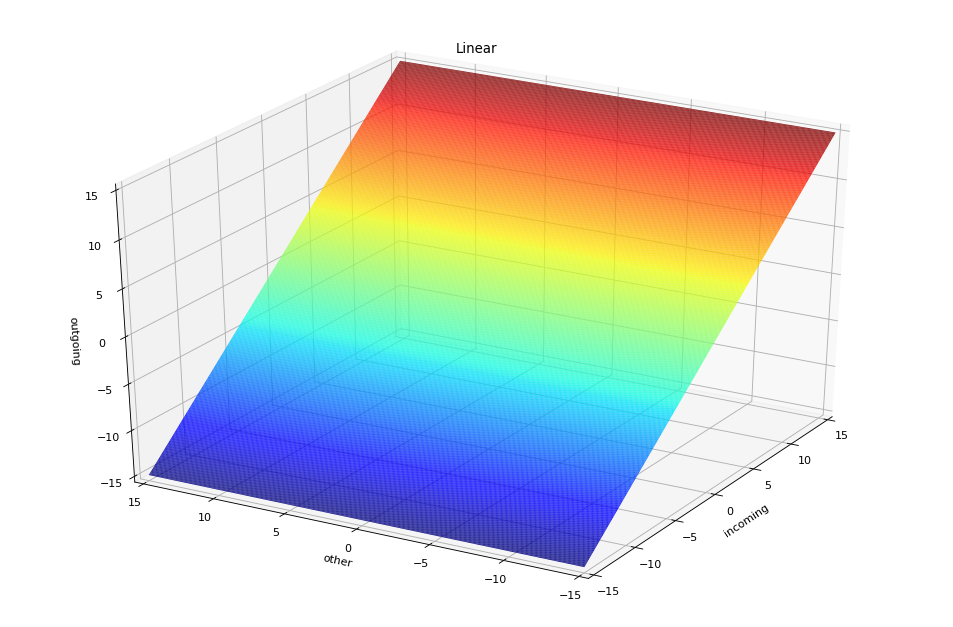

In [2]:
outgoing = incoming
plot('Linear', outgoing[0])

## Sigmoid Activation function

# $$\sigma(x) = \frac{1}{1+e^{-x}}$$

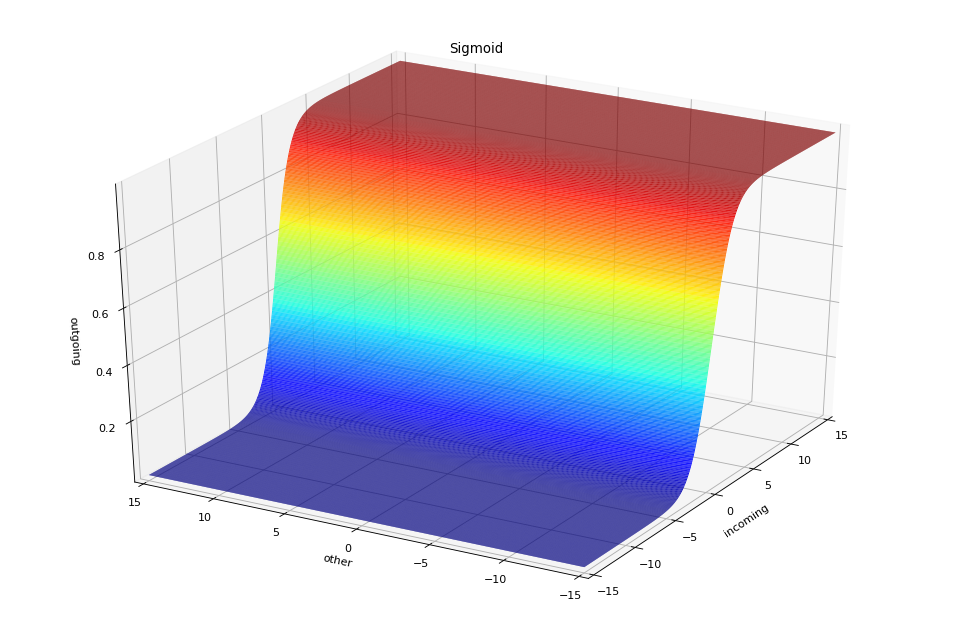

In [3]:
outgoing = 1 / (1 + np.exp(-incoming))
plot('Sigmoid', outgoing[0])

## ReLU Activation function

# $$ f(x) = \max(0, x) $$

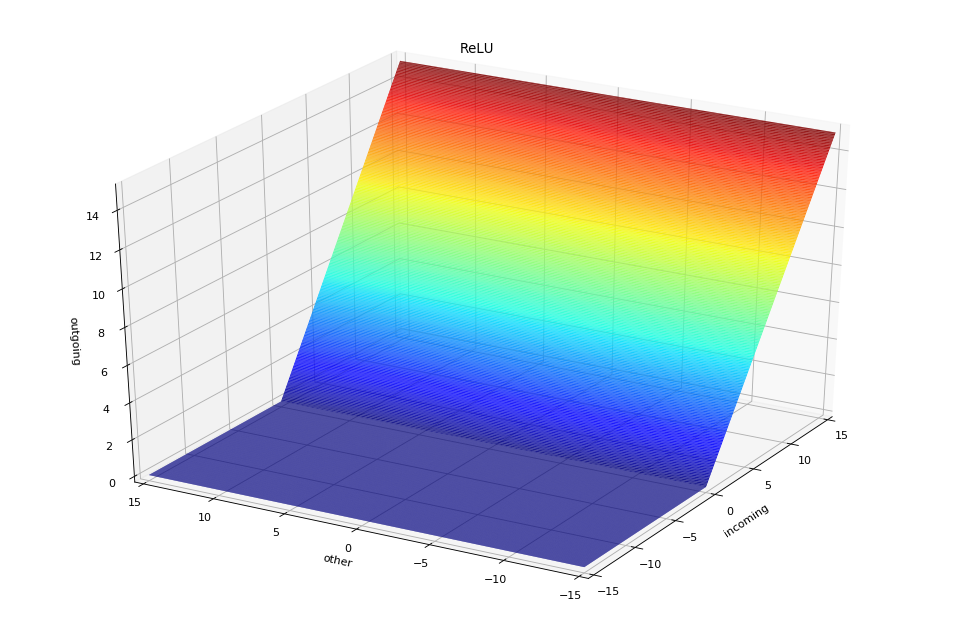

In [5]:
outgoing = np.maximum(0, incoming)
plot('ReLU', outgoing[0])

## Softmax Activation function

 

# $$ softmax(y_i) = \frac{e^{y_j}}{\sum_j e^{y_j}}$$

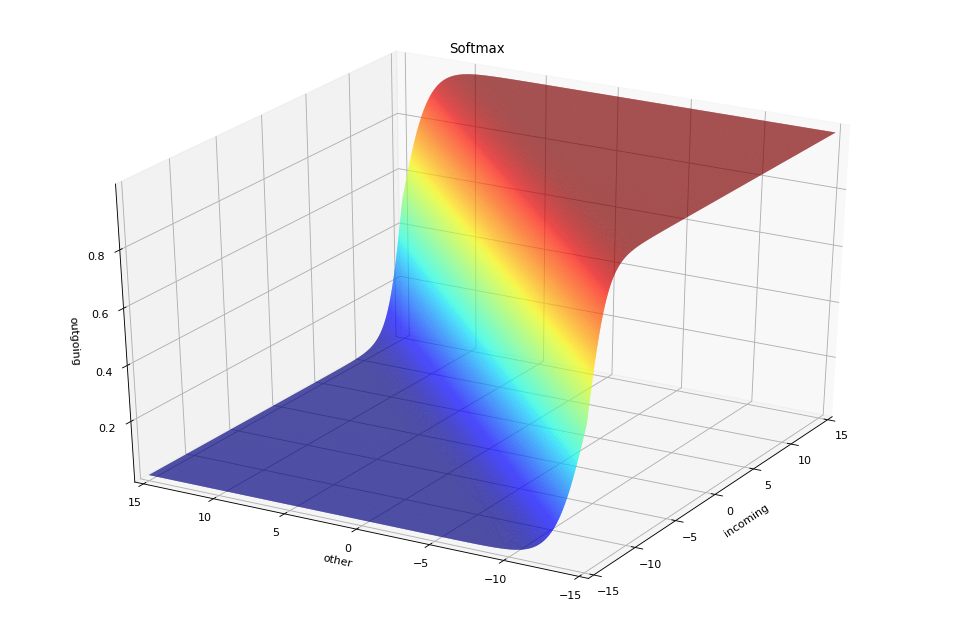

In [8]:
exps = np.exp(incoming)
outgoing = exps / exps.sum(axis=0)
assert np.allclose(outgoing.sum(axis=0), 1)
plot('Softmax', outgoing[0])

# Cost Functions

In [9]:
plot = utility.Plot(['prediction', 'target', 'cost'], (0, 1), (0, 1), 500)
plot.view(elev=0, azim=120)
prediction, target = plot.coords()

## Squared Error

# $$ MSE = \frac{1}{m} {\sum_i (\hat y - y )^2} $$

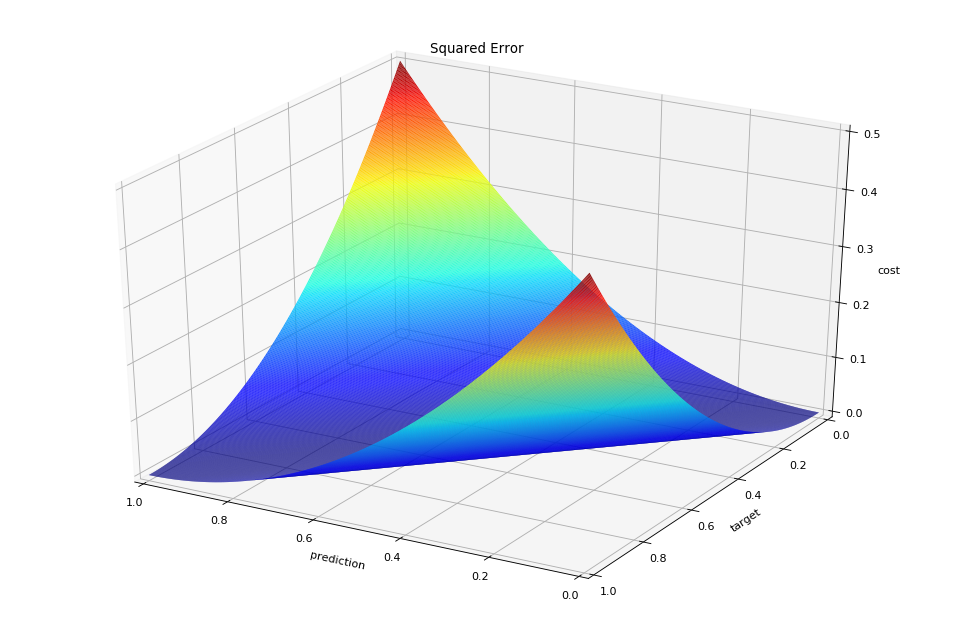

In [10]:
cost = (prediction - target) ** 2 / 2
plot('Squared Error', cost)

## Cross Entropy

# $$ H(p,q) = -\sum_i {p_i} \log_2(q_i) $$

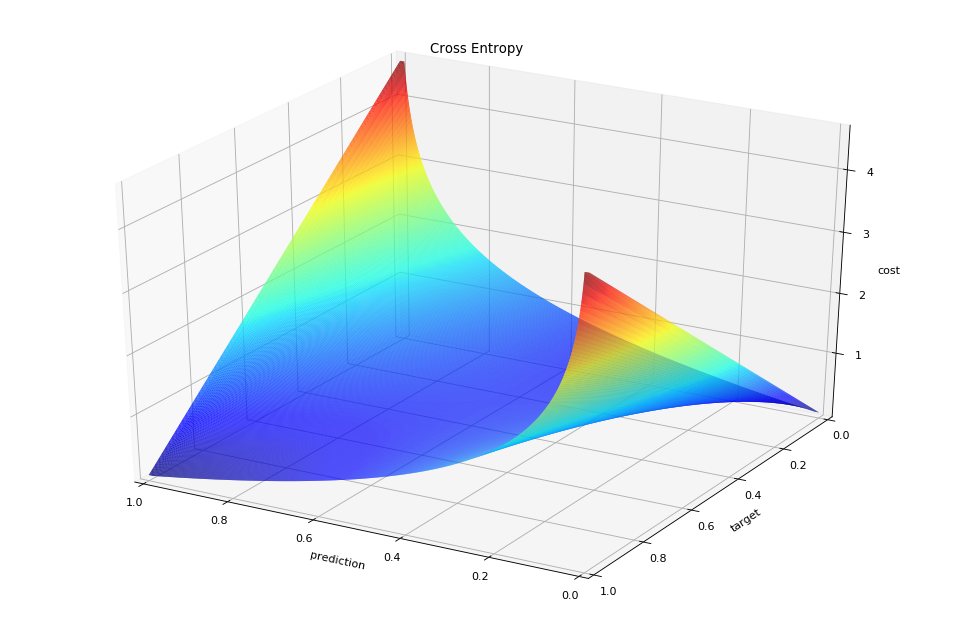

In [11]:
epsilon = 1e-2
clipped = np.clip(prediction, epsilon, 1 - epsilon)
cost = target * np.log(clipped) + (1 - target) * np.log(1 - clipped)
cost = -cost
plot('Cross Entropy', cost)